In [40]:
import numpy as np
import matplotlib.pyplot as plt

[**Câu 1.**]{.underline} Giả sử thời gian đi từ nhà đến trường của một học sinh có phân phối chuẩn với trung bình là 20 phút và độ lệch chuẩn là 4 phút. Mỗi tuần có 5 ngày học, mỗi ngày cô rời nhà 30 phút trước giờ học. Đối với mỗi bài toán sau, hãy viết một hàm mô phỏng Monte Carlo ngắn để tính xác suất hoặc kỳ vọng của đại lượng mà ta quan tâm.

In [3]:
n_days = 5
n_sim = 10000
mean_travel_time = 20
sd_travel_time = 4
late_condition = 30

1.  Tìm tổng thời gian di chuyển dự kiến của học sinh đó đến trường trong 5 ngày của một tuần. Sau đó tìm ước lượng mô phỏng và đưa ra sai số của ước lượng.

In [4]:
def create_travel_time_array(n_sim: int):
    travel_times = []
    for _ in range(n_sim):
        temp = np.random.normal(mean_travel_time, sd_travel_time, n_days)
        travel_times.append(temp)

    return np.array(travel_times)

travel_times = create_travel_time_array(n_sim)

- Total travel times

In [5]:
total_travel_times = [np.sum(travel_time) for travel_time in travel_times]
total_travel_times[0:5]

[86.45136976026578,
 91.949405504718,
 110.0699808138598,
 88.54461969005018,
 96.12644662787513]

- Simulate monte carlos

In [6]:
def monte_carlo_sim(n_sim, X):
    mean_X = np.mean(X)
    error = mean_X / np.sqrt(n_sim)

    return mean_X, error

expected_travel_time, est_error = monte_carlo_sim(n_sim, total_travel_times)
print(f"Expected travel time: {expected_travel_time}\nEstimated error: {est_error}")

Expected travel time: 100.03374469883752
Estimated error: 1.0003374469883752


2.  Tìm ước lượng xác suất để học sinh đó trễ ít nhất một tiết học trong tuần có 5 ngày. Sau đó đưa ra sai số của ước lượng tương ứng.

In [7]:
def get_late_times(travel_times):
    count = 0
    for week in travel_times:
        for time in week:
            if (time > 30):
                count += 1

    return count

total_lates = get_late_times(travel_times)
print(total_lates)

305


- Find late probability

In [8]:
late_prob = total_lates / travel_times.shape[0]
print(f"Probability: {late_prob}")

Probability: 0.0305


- Find errors

In [9]:
error = late_prob * (1 - late_prob) / n_sim
print(f"Error: {error}")

Error: 2.9569749999999998e-06


3.  Tìm ước lượng thời gian dài nhất bạn học sinh cần để đến trường trong 5 ngày của tuần học. Sau đó đưa ra sai số của ước lượng.

In [10]:
max_travel_times = np.array([np.max(time) for time in travel_times])
expected_max_travel_time = np.mean(max_travel_times)
error_max_travel_time = np.std(max_travel_times)
print(f"Expected max travel time: {expected_max_travel_time}\nEstimated max error: {error_max_travel_time}")

Expected max travel time: 24.657320230061735
Estimated max error: 2.6807220057781285


[**Câu 2.**]{.underline} Giả sử người ta thu được một mẫu có phân phối chuẩn có kích thước $n = 20$ nhưng chỉ ghi lại các giá trị trung vị mẫu và tứ phân vị thứ nhất $Q_1$ và thứ ba $Q_3$.

In [11]:
n = 20
n_sim = 10000

1.  Sử dụng có kích thước $n =20$ từ phân bố chuẩn, mô phỏng phân bố lấy mẫu của thống kê $S = M/(Q_3-Q_1)$ . Sau đó, lưu trữ các giá trị mô phỏng của $S$ vào một véc-tơ.

In [12]:
def create_sampling_vectors(n_sim):
    S = []
    for _ in range(n_sim):
        sample = np.random.standard_normal(size=n)
        q1, m, q3 = np.quantile(sample, [0.25, 0.5, 0.75])
        S.append(m/(q3 - q1))

    return np.array(S)


S = create_sampling_vectors(n_sim)
print(S)


[ 0.1541283   0.50348669 -0.05679755 ... -0.12162626  0.29732842
  0.18976584]


2.  Ước lượng khoảng tin cậy tương ứng với độ tin cậy $90\%$ cho $S$.

In [13]:
confidence_interval = np.quantile(S, [0.05, 0.95])
print(f"5% : {confidence_interval[0]}\n95% : {confidence_interval[1]}")

5% : -0.37984024257106064
95% : 0.3785803493003992


[**Câu 3.**]{.underline} Quan sát một mẫu ngẫu nhiên $y_1, y_2,…, y_n$ từ phân bố chuẩn với kỳ vọng là $\mu$ và phương sai là $\sigma^2$.

In [14]:
mu_sample3 = 0
var_sample3 = 1
n_sim = 10000
n = 5

a\. Biết rằng, trung bình mẫu

$$
S^2 = \dfrac{1}{n-1}\sum\limits_{j=1}^n (y_j-\bar{y})^2
$$

là ước lượng không chệch của $\sigma^2$. Để khẳng định điều này, giả sử $n =5$ và thực hiện một mô phỏng để tính toán độ lệch của phương sai mẫu $S^2$.


In [15]:
def estimate_var(sample):
    sample_h = np.mean(sample)
    sum_deviations = np.sum((sample - sample_h)**2)
    sample_size = sample.shape[0]

    return (sum_deviations)/(sample_size-1)

def simulate_var(n_sim: int):
    estimates = []
    for _ in range(n_sim):
        sample = np.random.normal(mu_sample3, np.sqrt(var_sample3), n)
        estimates.append(estimate_var(sample))

    return estimates


estimate_variances = simulate_var(n_sim)

mean_variances = np.mean(estimate_variances)
error = np.abs(mean_variances - var_sample3)

print(f"Mean variances: {mean_variances}\nError: {error}")
    

Mean variances: 1.0075317197061098
Error: 0.007531719706109774


b\. Hãy xem xét công cụ ước lượng phương sai thay thế

$$
S_c^2 = \dfrac{1}{c}\sum\limits_{j=1}^n(y_j-\bar{y})^2
$$

trong đó $c$ là hằng số. Giả sử người ta quan tâm đến việc tìm ước lượng $S_c^2$ sao cho

$$
MSE = E[(S_c^2-\sigma^2)^2]
$$

càng nhỏ càng tốt. Một lần nữa giả sử $n = 5$ và sử dụng thí nghiệm mô phỏng để ước lượng MSE của các ước lượng $S_3, S_5, S_7, S_9$ và cho biết ước lượng nào trong bốn ước lượng trên làm cho MSE cực tiểu.

In [16]:
c_array = [3, 5, 7, 9]
mse_results = []


def estimate_var2(sample, c: int):
    sample_h = np.mean(sample)
    sum_deviations = np.sum((sample - sample_h)**2)

    return np.sqrt((sum_deviations)/c)

def calculate_mse(est_value, true_value):
    return (est_value ** 2 - true_value ** 2)**2


for c in c_array:
    mse_c = []
    for _ in range(n_sim):
        sample = np.random.standard_normal(n)
        temp = estimate_var2(sample, c)

        mse_c.append(calculate_mse(temp, var_sample3))

    mse_results.append(np.array(mse_c).mean())

mse_results = np.array(mse_results)
print("MSE results: " , mse_results)
min_c_idx = np.where(mse_results == np.min(mse_results))[0][0]
print(f"c = {c_array[min_c_idx]} => MSE min")

MSE results:  [0.99145205 0.3619887  0.34592015 0.41220548]
c = 7 => MSE min


[**Câu 4.**]{.underline} Sử dụng phương pháp MC xấp xỉ phân bố nhị thức

[Gợi ý:]{.underline} Ta tung một đồng xu $10$ lần và muốn biết xác suất nhận được nhiều hơn $3$ mặt ngửa. Bây giờ đây là một số vấn đề tầm thường đối với phân bố nhị thức, nhưng giả sử chúng ta đã quên điều này hoặc chưa bao giờ học nó ngay từ đầu. Chúng ta có thể dễ dàng giải quyết vấn đề này bằng mô phỏng Monte Carlo. Chúng ta sẽ sử dụng thủ thuật phổ biến là biểu thị mặt sấp bằng 0 và mặt ngửa bằng 1, sau đó mô phỏng 10 lần tung đồng xu 100000 lần và xem điều đó xảy ra thường xuyên như thế nào.


In [17]:
n = 10
condition = 3
n_sim = 100000

In [18]:
def generate_coin_flip(number_of_flips: int):
    return np.random.random_integers(low=0, high=1, size=number_of_flips)

def sim_coin_flip(n_sim: int):
    flip_sims = []
    for _ in range(n_sim):
        flip_sims.append(generate_coin_flip(n))

    return np.array(flip_sims)

def total_condition_pass(flips_sim, condition: int):
    count_pass = 0
    for flips in flips_sim:
        count = 0
        for flip in flips:
            if (flip == 1):
                count += 1

        if (count > condition):
            count_pass += 1

    return count_pass


flips = sim_coin_flip(n_sim)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12888\878907266.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  return np.random.random_integers(low=0, high=1, size=number_of_flips)


In [19]:
total_pass = total_condition_pass(flips, condition)            
pass_prob = total_pass / n_sim
print(f"Total pass: {total_pass}\nPass probability: {pass_prob}")

Total pass: 82647
Pass probability: 0.82647


[**Câu 5.**]{.underline} Sử dụng phương pháp MC xấp xỉ số **Pi** ($\pi$)

[Gợi ý:]{.underline} Ta biết rằng, diện tích của hình tròn có bán kính $r$

$$ A = \pi r^2.$$

Nếu bao quanh hình tròn đó bởi một hình vuông thì diện tích của hình vuông đó là

$$A = 4r^2$$


Ta có thể thấy rằng tỷ lệ giữa diện tích hình tròn và diện tích hình vuông là $\dfrac{\pi}{4}$. Do đó, ta chỉ cần làm thực nghiệm tỷ số này rồi nhân với 4 sẽ ra được xấp xỉ cho $\pi$. Để làm được điều này ta có thể lấy ngẫu nhiên $x$ và $y$ từ hình vuông đơn vị có tâm là 0. Nếu $x^2+y^2 < r^2$, thì điểm nằm trong đường trong (xét với trường hợp $r =0.5$). Khi đó, tỷ lệ số điểm trong hình tròn trên tổng số điểm của mẫu nhân với 4 sẽ xấp xỉ $\pi$.

**Y/c: vẽ cả các điểm trong hình tròn với màu xanh, điểm trong hình vuông nhưng ngoài hình tròn là màu xám.**

In [45]:
r = 0.5
n_sim = 20000
n_points = n_sim

- Generate points in range (-r, r)

In [46]:
x = np.linspace(-r, r, n_points)
y = np.linspace(-r, r, n_points)

np.random.shuffle(x)
np.random.shuffle(y)

points = np.row_stack((x, y)).T
points.shape

(20000, 2)

- Get inner and outer points

In [47]:
def get_inner_outer_points(points, r):
    inners = []
    outers = []
    for p in points:
        px, py = p

        dist2 = px**2 + py**2
        if (dist2 < r**2):
            inners.append(p)
        else: 
            outers.append(p)

    return np.array(inners), np.array(outers)


inners, outers = get_inner_outer_points(points, r)

- Estimate pi

In [48]:
est_pi = inners.shape[0] * 4 / points.shape[0]
est_pi

3.1416

- plot

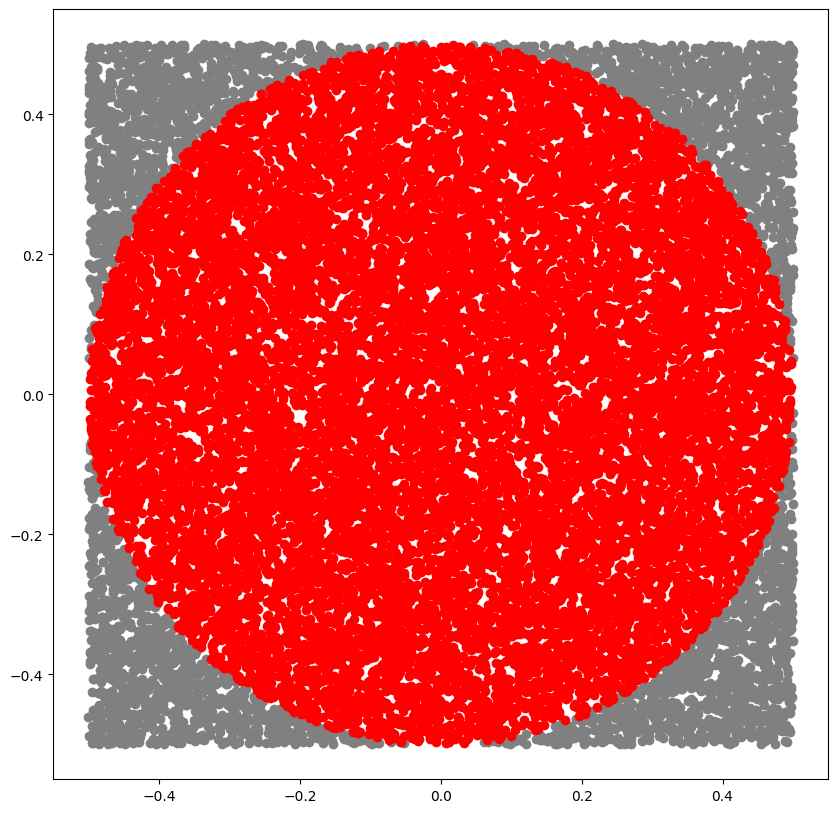

In [64]:
x_in, y_in = inners.T
x_out, y_out = outers.T

plt.figure(figsize=(10, 10))
plt.scatter(x_out, y_out, color="gray")
plt.scatter(x_in, y_in, color="red")

plt.show()